# Python Data Visualization about Seattle's precipitation and weather

In [14]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sbn
import os


#### To read the sample data 

In [60]:
### to read the sealtle weather data 
## set the index and date in the date, it is very important later
seattle = pd.read_csv("SW.csv",parse_dates =['date'], index_col =['date']) ## set the index, it is easier later.
print(seattle.head())
print(seattle.describe())
print(seattle.info())

            precipitation  temp_max  temp_min  wind  weather
date                                                        
2012-01-01            0.0      12.8       5.0   4.7  drizzle
2012-01-02           10.9      10.6       2.8   4.5     rain
2012-01-03            0.8      11.7       7.2   2.3     rain
2012-01-04           20.3      12.2       5.6   4.7     rain
2012-01-05            1.3       8.9       2.8   6.1     rain
       precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136
std         6.680194     7.349758     5.023004     1.437825
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    10.600000     4.400000     2.200000
50%         0.000000    15.600000     8.300000     3.000000
75%         2.800000    22.200000    12.200000     4.000000
max        55.900000    35.600000    18.300000     9.500000
<class 'pandas.core.frame.DataFra

In [61]:
seattle.tail(10)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2015-12-22,4.6,7.8,2.8,5.0,fog
2015-12-23,6.1,5.0,2.8,7.6,fog
2015-12-24,2.5,5.6,2.2,4.3,fog
2015-12-25,5.8,5.0,2.2,1.5,fog
2015-12-26,0.0,4.4,0.0,2.5,sun
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog
2015-12-30,0.0,5.6,-1.0,3.4,sun


In [64]:

seattle_month = seattle.resample('M')['precipitation','temp_max','wind'].mean()

In [27]:
##build a fucntion to read the base information for datafram.
def baseinfor(d):
    print(d.head(8))
    print(d.describe())
    print(d.info())

In [38]:
### to check sealtle and country
seattle.columns

Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

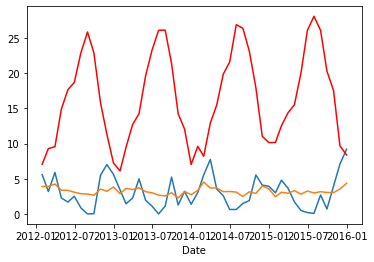

In [79]:
### to se the sealtle:
from pandas.plotting import register_matplotlib_converters as rmc

fig, ax = plt.subplots()
ax.plot(seattle_month.index, seattle_month['precipitation'])
ax.plot(seattle_month.index, seattle_month['temp_max'],color='r')
ax.plot(seattle_month['wind'])
ax.set_xlabel('Date')
plt.show()

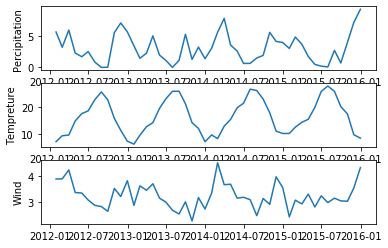

In [77]:
####  seperate all the graph in the different subplots
fig,ax = plt.subplots(3,1)
ax[0].plot(seattle_month['precipitation'])
ax[1].plot(seattle_month['temp_max'])
ax[2].plot(seattle_month['wind'])
ax[1].set_xlabel("Time(months)")
ax[0].set_ylabel("Percipitation")
ax[1].set_ylabel("Tempreture")
ax[2].set_ylabel("Wind")
plt.show()


In [80]:
### we just want to see two years: 2012 -2013
two_years = seattle_month["2012-01-01":"2013-12-31"]

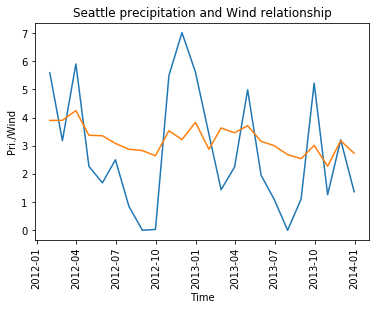

In [88]:
fig, ax = plt.subplots()
ax.plot(two_years.index, two_years['precipitation'])
ax.plot(two_years['wind'])
ax.set_xlabel('Time')
ax.set_title("Seattle precipitation and Wind relationship")
ax.set_ylabel("Pri./Wind")
plt.xticks(rotation = 90)
plt.show()

No handles with labels found to put in legend.


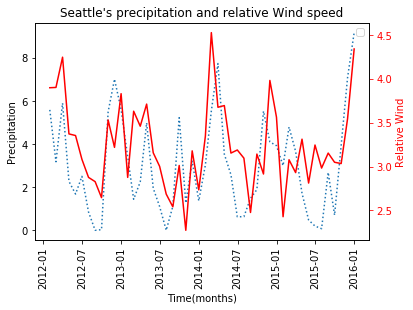

In [107]:
### SET twins y-axis 

fig,ax = plt.subplots()

ax.plot(seattle_month['precipitation'],":")
ax.set_xlabel("Time(months)")
ax.set_ylabel("Precipitation")

plt.xticks(rotation = 90)
ax.set_title("Seattle's precipitation and relative Wind speed")
ax2 = ax.twinx()
ax2.plot(seattle_month['wind'],color="red")
ax2.set_ylabel("Relative Wind", color ="red")
ax2.tick_params('y',colors= "red")

plt.show()


In [113]:
### Transform the data 
seattle.head()


,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


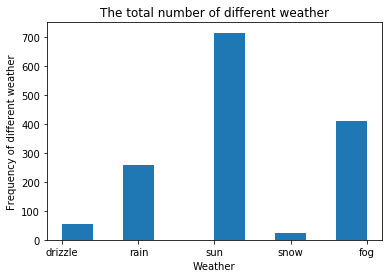

In [122]:
### we want to see the frequency of different weather type:
fig, ax = plt.subplots()
ax.hist(seattle['weather'])
ax.set_xlabel("Weather")
ax.set_ylabel("Frequency of different weather")
ax.set_title("The total number of different weather")
plt.show()

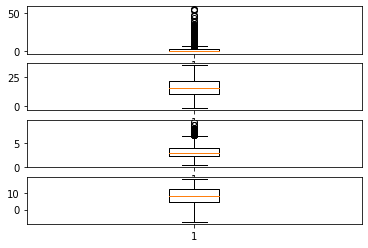

In [123]:
#### To see the boxplots for 
fig,ax = plt.subplots(4,1)


ax[0].boxplot(seattle['precipitation'])
ax[1].boxplot(seattle['temp_max'])
ax[2].boxplot(seattle['wind'])
ax[3].boxplot(seattle['temp_min'])


plt.show()

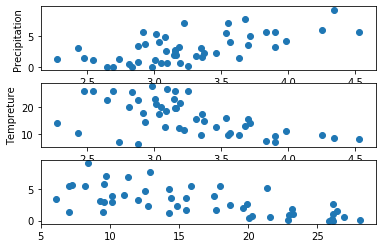

In [128]:
### To explore the scatter : the relationship between the tempreture and wind

fig, ax = plt.subplots(3,1)

ax[0].scatter(seattle_month['wind'],seattle_month['precipitation'])
ax[0].set_xlabel("Wind")
ax[0].set_ylabel("Precipitation")
ax[1].scatter(seattle_month['wind'],seattle_month['temp_max'])
ax[1].set_xlabel("Wind")
ax[1].set_ylabel("Tempreture")
ax[2].scatter(seattle_month['temp_max'],seattle_month['precipitation'])
plt.show()

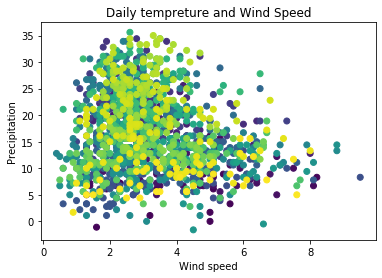

In [136]:
#### we use that the daily  encoding the time 
fig,ax = plt.subplots()
ax.scatter(seattle['wind'],seattle['temp_max'], c= seattle.index)
ax.set_xlabel("Wind speed")
ax.set_ylabel("Precipitation")
ax.set_title("Daily tempreture and Wind Speed")
plt.show()